In [12]:
!pip install yolov5 --quiet

In [28]:
import yolov5
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [14]:
%cd /Users/sumukhiganesan/GitHub/ds5500-capstone-project/yolov5

/Users/sumukhiganesan/GitHub/ds5500-capstone-project/yolov5


In [15]:
# Load custom models
# model1 = yolov5.load('runs/train/exp1/weights/best.pt')  
# model2 = yolov5.load('runs/train/exp2/weights/best.pt') 
model3 = yolov5.load('runs/train/exp3/weights/best.pt') 

In [16]:
img_path = '/Users/sumukhiganesan/GitHub/ds5500-capstone-project/datasets/detection_dataset/images/train/00120.png'

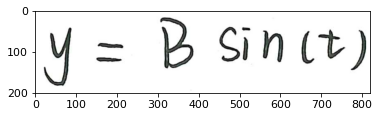

In [17]:
# Load image
img = cv2.imread(img_path) 
plt.imshow(img)
plt.show()

In [18]:
results = model3(img_path)

In [19]:
results

YOLOv5 <class 'yolov5.models.common.Detections'> instance
image 1/1: 201x820 9 items
Speed: 21.3ms pre-process, 125.9ms inference, 23.2ms NMS per image at shape (1, 3, 160, 640)

In [20]:
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

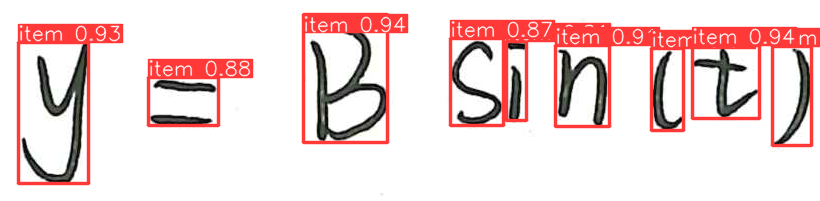

In [21]:
results.show()

In [22]:
info = results.pandas().xyxy[0].to_dict(orient = "records")

In [23]:
df = pd.DataFrame(info)

df = df.sort_values(["xmin"]).reset_index(drop=True)

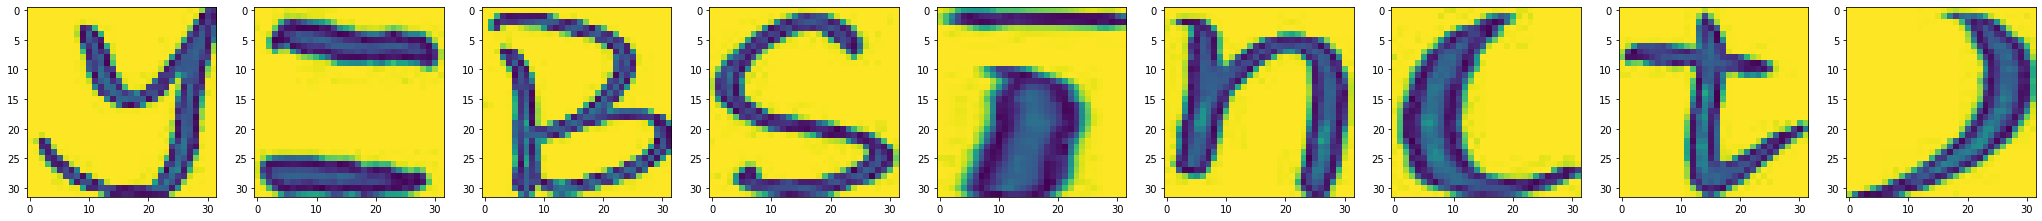

In [31]:
num_objects = len(info)
ls_symbols = []
fig, ax = plt.subplots(1, num_objects, figsize=(num_objects * 4, 4))
for i, obj in df.iterrows():
    symbol = img[int(obj["ymin"]):int(obj["ymax"]), int(obj["xmin"]):int(obj["xmax"])]
    symbol_transformed = cv2.resize(symbol, (32,32))
    symbol_transformed = cv2.cvtColor(symbol_transformed, cv2.COLOR_BGR2GRAY)
    symbol_transformed = cv2.normalize(symbol_transformed, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    ax[i].imshow(symbol_transformed)
    ls_symbols.append(symbol_transformed)

In [34]:
x = np.array(ls_symbols)
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1).astype("float32")
print(x.shape)

(9, 32, 32, 1)


In [ ]:
from keras.models import load_model

model = load_model('cnn_model.h5')